<a href="https://colab.research.google.com/github/TSffer/Topicos-IA/blob/master/Regresion_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def Leer_Datos(filename): 
    data = pd.read_csv(filename, sep=',', header=None).to_numpy()
    return data

def Normalizar_Datos(data):
    meam_data = data.mean(axis=0)
    std_data = data.std(axis=0)
    normalization_t = data - meam_data
    normalization_t = normalization_t / std_data
    return normalization_t
    

In [0]:
def sigmoid(z_):
    return 1 / (1 + np.exp(-z_))

def f_costo(theta_,  x_, y_ ):
    m = x_.shape[0]
    h_theta = np.dot(x_, theta_)
    pred = sigmoid(h_theta)
    result = -(np.multiply(y_, np.log(pred)) + np.multiply((1 - y_), np.log(1 - pred)))
    result = (1/m) * np.sum(result)
    return result

def gradiente(x_, y_, theta_):
    m = x_.shape[0]
    h_theta = np.dot(x_, theta_)
    a = sigmoid(h_theta)
    dz = a - y_
    dw = (1/m) * np.dot(x_.T, dz)
    return dw
    

def gradiente_descendiente(x, y, alpha, theta_, it=10):
    cost_h = np.zeros(it)
    m = x.shape[0]
    for i in range(it):    
        dw =  gradiente(x, y, theta_)
        cost_h[i] = f_costo(theta_, x, y)
        theta_ = theta_ - alpha * dw 
        
    return theta_, cost_h

def accuracy(x_, y_, theta_):
    z = np.dot(x_, theta_)
    pr = sigmoid(z)
    m = pr.shape[1]
    pr = np.round_(pr,decimals=3)
    pred = [] 
    index  = 0
    y_ = list(y_[:,-1])
    pr = list(pr[:,-1])

    for i in range(len(pr)):
        if (pr[i] > 0.5):
            pred.append(1)
        else:
            pred.append(0)  

    num_correct = 0
    for i in range(len(pr)):
        if(pred[i] == y_[i]):
            num_correct += 1
    #print(pred)
    #print(y_)
    return num_correct /len(pred)


def predict(X, model):
    W = model
    z = np.matmul(X, W.T) 
    a = Yhat = sigmoid(z.T)
    m = a.shape[1]
    
    for ai in np.matrix.tolist(a)[0]:
        print(ai)
        if ai >0.5:
            print('We predict' , 1)
        else:
            print('We predict', 0)

In [0]:
def k_fols(data, k):
    data_n = Normalizar_Datos(data[:,0:data.shape[1]-1])
    print('Sub_matriz: ',data_n.shape)
    y =  data[:,-1]    
    print('Sin normalizar: ',data.shape)
    
    data = np.column_stack((data_n, y))

    print('Con normalizar: ', data.shape)
    clase_0 = np.count_nonzero( y == 0)
    clase_1 = np.count_nonzero( y == 1)

    #p_clase0 = (clase_0/sizedata) * 100
    #p_clase1 = (clase_1/sizedata) * 100

    div0 = int(clase_0/3)
    div1 = int(clase_1/3)
    print('clase 0: ', div0)
    print('clase 1: ', div1)

    class_1 = data[0:clase_1, :]
    class_0 = data[clase_1:clase_1+clase_0, :]

    np.random.shuffle(class_0)
    np.random.shuffle(class_1)
    
    size_fold = int(data.shape[0] / k)
    remainder_size_fold = int(data.shape[0] % k)
    data = data[:data.shape[0] - remainder_size_fold, :]

    k_fols = []
    idx_row0 = 0
    idx_row1 = 0
    for i in range(k):
        X0 = class_0[idx_row0:idx_row0+div0, :]
        X1 = class_1[idx_row1:idx_row1+div1, :]
        X = np.concatenate((X0, X1))
        k_fols.append(X)
        idx_row0 += div0
        idx_row1 += div1
    return k_fols, size_fold


In [0]:
def Crear_Entrenamiento_Prueba(k):
    data = pd.read_csv('/content/drive/My Drive/ConjuntosRLog/diabetes.csv', sep='\t')
    data.sort_values(by = ['Outcome'], inplace = True ,ascending = False)
    data = data.to_numpy()
    k_f , siz = k_fols(data, k)

    for i in range(k):
        np.savetxt('/content/drive/My Drive/ConjuntosRLog/Diabetes_Data/fold_'+str(i)+'.csv', k_f[i], delimiter=',')
    
#Crear_Entrenamiento_Prueba(3)

In [6]:
# Experimento 1
def Separar_X_y(data):
    n = data.shape[1]
    X = data[:, :n-1]
    y = data[:, n-1:]
    return X, y

def EXP1(filename, dataname):
    k_fols = []
    for i in range(3):
        X = Leer_Datos(filename +'/fold_'+str(i)+'.csv')
        k_fols.append(X)
    
    apr = np.array([0.01, 0.05, 0.1, 0.2, 0.3, 0.4])
    s = 0
    sum_acc = 0
    acc = np.zeros((7,6),float)
    for it in range(500,4000,500):
        for i in range(len(apr)):
            for k in range(3):
                data_train = np.concatenate((k_fols[(k+1)%3], k_fols[(k+2)%3]))
                data_test = k_fols[k]
                train_x, train_y = Separar_X_y(data_train)
                test_x, test_y = Separar_X_y(data_test)
                Theta = np.zeros((train_x.shape[1],1),float)
                theta_GD , cost = gradiente_descendiente(train_x,train_y,apr[i], Theta, it)
                sum_acc += accuracy(test_x, test_y, theta_GD)
            acc[s,i] = sum_acc/3
            sum_acc = 0.0
        s = s + 1       
    
    print("Conjunto de Datos: " + dataname)
    fils = ["iter: 500", "iter: 1000", "iter: 1500", "iter: 2000", "iter: 2500", "iter: 3000", "iter: 3500"]
    cols = ["α: 0.01", "α: 0.05", "α: 0.1", "α: 0.2", "α: 0.3", "α: 0.4"]
    df = pd.DataFrame(acc, columns=cols, index=fils)

    print(df)
    print('\n')

EXP1('/content/drive/My Drive/ConjuntosRLog/Enfermedad_Cardiaca_Data','Enfermedad Cardiaca')
EXP1('/content/drive/My Drive/ConjuntosRLog/Diabetes_Data', 'Diabetes')

Conjunto de Datos: Enfermedad Cardiaca
             α: 0.01   α: 0.05    α: 0.1    α: 0.2    α: 0.3    α: 0.4
iter: 500   0.834983  0.858086  0.858086  0.854785  0.854785  0.854785
iter: 1000  0.834983  0.858086  0.854785  0.854785  0.854785  0.854785
iter: 1500  0.844884  0.858086  0.854785  0.854785  0.854785  0.854785
iter: 2000  0.854785  0.854785  0.854785  0.854785  0.854785  0.854785
iter: 2500  0.858086  0.854785  0.854785  0.854785  0.854785  0.854785
iter: 3000  0.858086  0.854785  0.854785  0.854785  0.854785  0.854785
iter: 3500  0.858086  0.854785  0.854785  0.854785  0.854785  0.854785


Conjunto de Datos: Diabetes
             α: 0.01   α: 0.05    α: 0.1    α: 0.2    α: 0.3    α: 0.4
iter: 500   0.733333  0.738562  0.739869  0.739869  0.739869  0.739869
iter: 1000  0.742484  0.739869  0.739869  0.739869  0.739869  0.739869
iter: 1500  0.739869  0.741176  0.739869  0.739869  0.739869  0.739869
iter: 2000  0.738562  0.739869  0.739869  0.739869  0.739869  0.739869
iter: 25

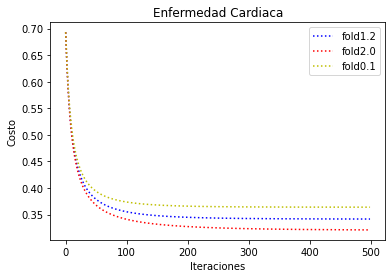

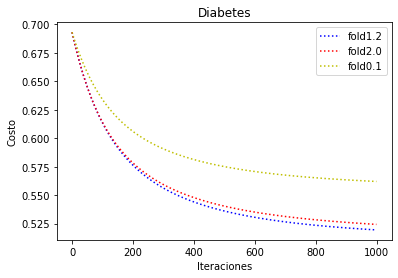

In [7]:
# Experimento 2
def EXP2(filename, dataname, iter_, apr):
    k_fols = []
    for i in range(3):
        X = Leer_Datos(filename +'/fold_'+str(i)+'.csv')
        k_fols.append(X)

    cl = ['b:','r:','y:']
    cost_ht = []
    for k in range(3):
        data_train = np.concatenate((k_fols[(k+1)%3], k_fols[(k+2)%3]))
        data_test = k_fols[k]
        train_x, train_y = Separar_X_y(data_train)
        test_x, test_y = Separar_X_y(data_test)
        Theta = np.zeros((train_x.shape[1],1),float)
        theta_GD , cost_h = gradiente_descendiente(train_x,train_y, apr, Theta, iter_)
        cost_ht.append(cost_h)
        
    plt.plot(np.arange(cost_ht[0].shape[0]),cost_ht[0], cl[0], label='fold1.2')
    plt.plot(np.arange(cost_ht[1].shape[0]),cost_ht[1], cl[1], label='fold2.0')
    plt.plot(np.arange(cost_ht[2].shape[0]),cost_ht[2], cl[2], label='fold0.1')
    plt.title(dataname)
    plt.xlabel('Iteraciones')
    plt.ylabel('Costo')
    plt.legend()
    plt.show()

EXP2('/content/drive/My Drive/ConjuntosRLog/Enfermedad_Cardiaca_Data','Enfermedad Cardiaca', 500, 0.1)
EXP2('/content/drive/My Drive/ConjuntosRLog/Diabetes_Data', 'Diabetes', 1000, 0.01)